In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run ../src/cot/train.py --n_head 2 --n_layer 2 --nb_epochs 500 --load_checkpoint False

INFO:cot.data.data_processing:Generating data. Saving in /private/home/vivc/code/llm/cot/data/raw/binary_copy
INFO:cot.data.data_processing:Loading training data for binary_copy problem.
INFO:cot.data.data_processing:Setting sampler.
INFO:cot.data.data_processing:Loading test data for binary_copy problem.
INFO:__main__:Number of training data: 382.
INFO:__main__:Model: Transformer(
  (embeddings): Embedding(
    (token_emb): Embedding(5, 128)
    (pos_emb): Embedding(19, 128)
  )
  (blocks): ModuleList(
    (0-1): 2 x TransformerBlock(
      (norm_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (attn): SelfAttention(
        (qkv_mat): Linear(in_features=128, out_features=384, bias=False)
        (output): Linear(in_features=128, out_features=128, bias=False)
      )
      (norm_2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (ffn): FeedForward(
        (fc1): Linear(in_features=128, out_features=512, bias=False)
        (fc2): Linear(in_features=512, ou

In [3]:
import matplotlib.pyplot as plt
import torch
from cot.data import BinaryCopy, Parity
from cot.config import CHECKPOINT_DIR

problem = BinaryCopy

path = CHECKPOINT_DIR / problem.prefix / 'model.pth'

checkpoint = torch.load(path)

evals = checkpoint["evals"]
ind = evals != -1
evals = evals[ind]

eval = checkpoint["evals"].argmax() + 1

acc_by_len = checkpoint["acc_by_len"][ind]
test_acc_by_len = checkpoint["test_acc_by_len"][ind]
spe_acc = checkpoint["spe_acc"][ind]
test_spe_acc = checkpoint["test_spe_acc"][ind]
losses = checkpoint["losses"]

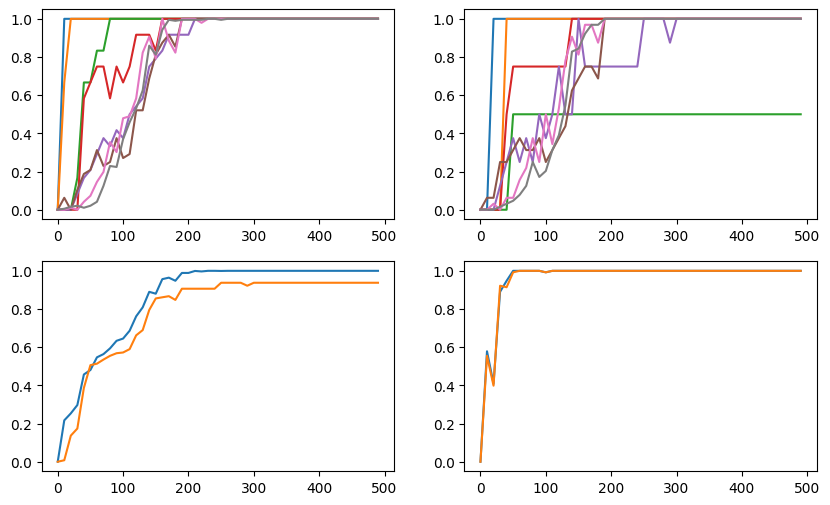

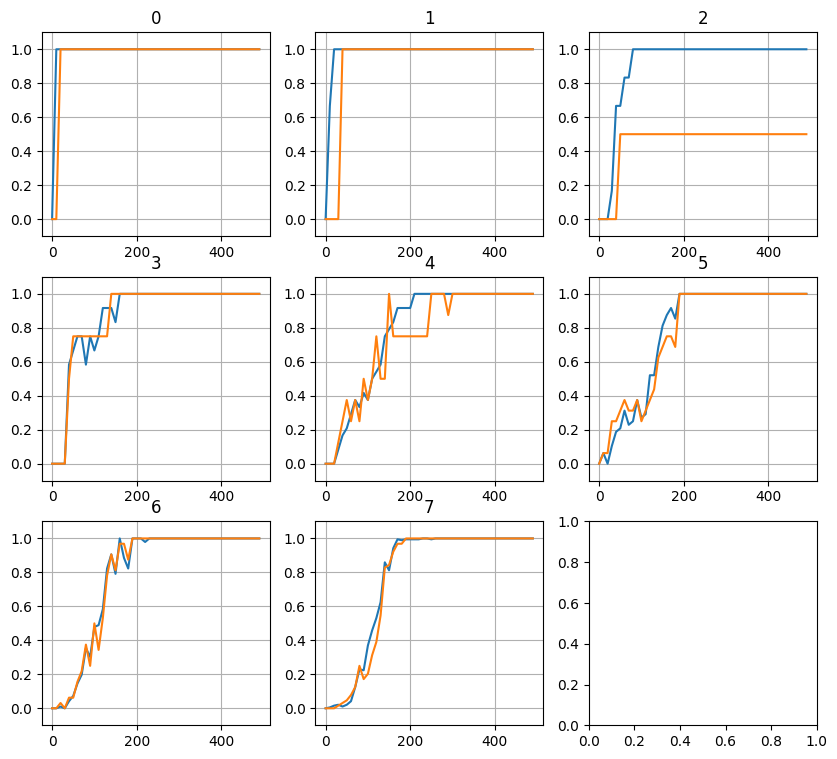

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes[0, 0].plot(evals, acc_by_len)
axes[0, 1].plot(evals, test_acc_by_len)
axes[1, 0].plot(evals, acc_by_len.mean(axis=1))
axes[1, 0].plot(evals, test_acc_by_len.mean(axis=1))
axes[1, 1].plot(evals, spe_acc[:, 2])
axes[1, 1].plot(evals, test_spe_acc[:, 2])
# axes[1, 1].set_xlim(0, 50)

nb_len = 8
fig, axes = plt.subplots(nb_len // 3 + (1 if nb_len % 3 else 0), 3, figsize=(10, 9))
for i in range(nb_len):
    axes[i // 3, i % 3].plot(evals, acc_by_len[:, i])
    axes[i // 3, i % 3].plot(evals, test_acc_by_len[:, i])
    axes[i // 3, i % 3].set_ylim(-.1, 1.1)
    axes[i // 3, i % 3].set_title(i)
    axes[i // 3, i % 3].grid()

In [5]:
%run ../src/cot/train.py --n_head 1 --n_layer 1 --nb_epochs 1500 --load_checkpoint False

INFO:cot.data.data_processing:Generating data. Saving in /private/home/vivc/code/llm/cot/data/raw/binary_copy
INFO:cot.data.data_processing:Loading training data for binary_copy problem.
INFO:cot.data.data_processing:Setting sampler.
INFO:cot.data.data_processing:Loading test data for binary_copy problem.
INFO:__main__:Number of training data: 382.
INFO:__main__:Model: Transformer(
  (embeddings): Embedding(
    (token_emb): Embedding(5, 128)
    (pos_emb): Embedding(19, 128)
  )
  (blocks): ModuleList(
    (0): TransformerBlock(
      (norm_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (attn): SelfAttention(
        (qkv_mat): Linear(in_features=128, out_features=384, bias=False)
        (output): Linear(in_features=128, out_features=128, bias=False)
      )
      (norm_2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (ffn): FeedForward(
        (fc1): Linear(in_features=128, out_features=512, bias=False)
        (fc2): Linear(in_features=512, out_feat

INFO:__main__:Epoch     9, Loss: 0.4553
INFO:__main__:Epoch    10, Loss: 0.4552
INFO:__main__:Epoch    10, Accuracy: 0.0026, 0.0000
INFO:__main__:Epoch    11, Loss: 0.4459
INFO:__main__:Epoch    12, Loss: 0.4065
INFO:__main__:Epoch    13, Loss: 0.4251
INFO:__main__:Epoch    14, Loss: 0.4178
INFO:__main__:Epoch    15, Loss: 0.4197
INFO:__main__:Epoch    16, Loss: 0.3890
INFO:__main__:Epoch    17, Loss: 0.3743
INFO:__main__:Epoch    18, Loss: 0.3525
INFO:__main__:Epoch    19, Loss: 0.3606
INFO:__main__:Epoch    20, Loss: 0.3550
INFO:__main__:Epoch    20, Accuracy: 0.1699, 0.0000
INFO:__main__:Epoch    21, Loss: 0.3526
INFO:__main__:Epoch    22, Loss: 0.3357
INFO:__main__:Epoch    23, Loss: 0.3502
INFO:__main__:Epoch    24, Loss: 0.3510
INFO:__main__:Epoch    25, Loss: 0.3031
INFO:__main__:Epoch    26, Loss: 0.3348
INFO:__main__:Epoch    27, Loss: 0.3384
INFO:__main__:Epoch    28, Loss: 0.3136
INFO:__main__:Epoch    29, Loss: 0.3177
INFO:__main__:Epoch    30, Loss: 0.2838
INFO:__main__:Ep

In [6]:
import matplotlib.pyplot as plt
import torch
from cot.data import BinaryCopy, Parity
from cot.config import CHECKPOINT_DIR

problem = BinaryCopy

path = CHECKPOINT_DIR / problem.prefix / 'model.pth'

checkpoint = torch.load(path)

evals = checkpoint["evals"]
ind = evals != -1
evals = evals[ind]

eval = checkpoint["evals"].argmax() + 1

acc_by_len = checkpoint["acc_by_len"][ind]
test_acc_by_len = checkpoint["test_acc_by_len"][ind]
spe_acc = checkpoint["spe_acc"][ind]
test_spe_acc = checkpoint["test_spe_acc"][ind]
losses = checkpoint["losses"]

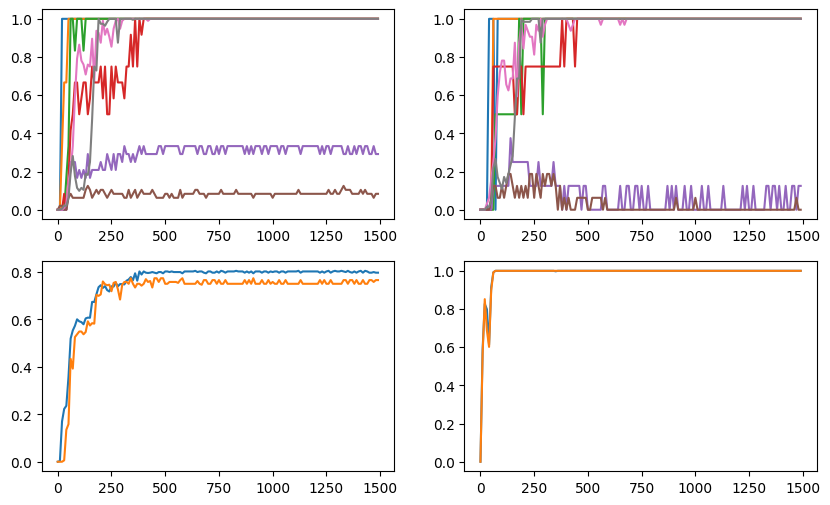

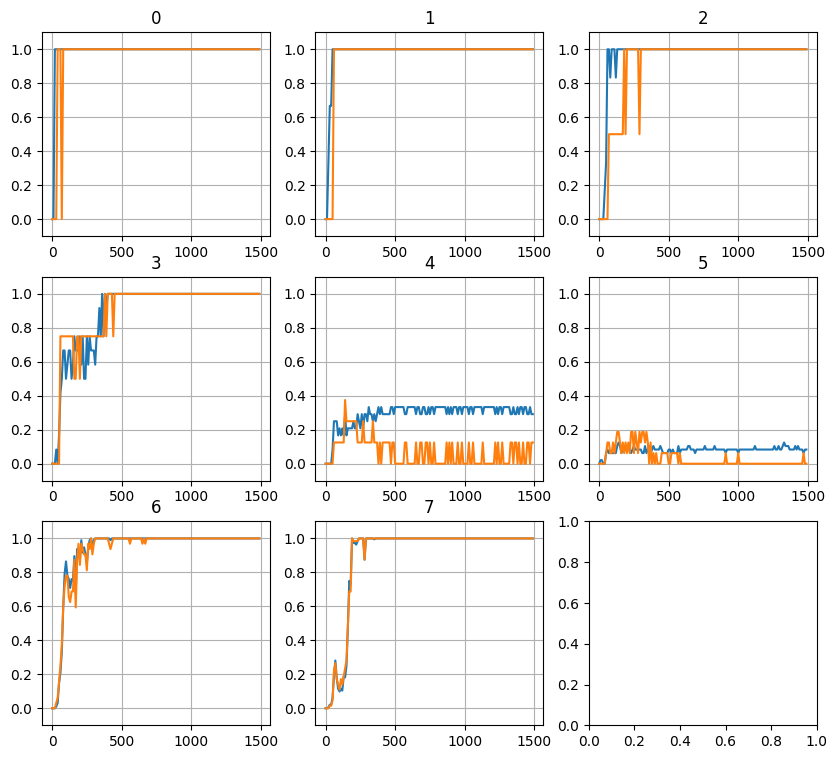

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes[0, 0].plot(evals, acc_by_len)
axes[0, 1].plot(evals, test_acc_by_len)
axes[1, 0].plot(evals, acc_by_len.mean(axis=1))
axes[1, 0].plot(evals, test_acc_by_len.mean(axis=1))
axes[1, 1].plot(evals, spe_acc[:, 2])
axes[1, 1].plot(evals, test_spe_acc[:, 2])
# axes[1, 1].set_xlim(0, 50)

nb_len = 8
fig, axes = plt.subplots(nb_len // 3 + (1 if nb_len % 3 else 0), 3, figsize=(10, 9))
for i in range(nb_len):
    axes[i // 3, i % 3].plot(evals, acc_by_len[:, i])
    axes[i // 3, i % 3].plot(evals, test_acc_by_len[:, i])
    axes[i // 3, i % 3].set_ylim(-.1, 1.1)
    axes[i // 3, i % 3].set_title(i)
    axes[i // 3, i % 3].grid()